# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다.
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다.
    * 여러분은 이 프로젝트팀에 DX 컨설턴트로써 데이터분석을 맡았습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!
----
* 반복되는 코드는 함수로 만듭시다!
    * 함수를 만드는 순서
        * 먼저 절차대로 코드를 작성해서 실행한다.
        * 실행된 코드(오류가 없는 코드)를 가져다 함수로 구성한다.
            * 입력과 출력 결정

# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

In [3]:
def eda_1_n(data, var, bins = 30) :
    print(data[[var]].describe().T)
    print()

    plt.figure(figsize = (6,8))
    plt.subplot(2,1,1)
    sns.histplot(x=data[var], bins = 20, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])

    plt.tight_layout()
    plt.show()

## (1) Sales (Target)

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포 확인

       count      mean       std  min   25%   50%   75%    max
Sales  400.0  7.496325  2.824115  0.0  5.39  7.49  9.32  16.27



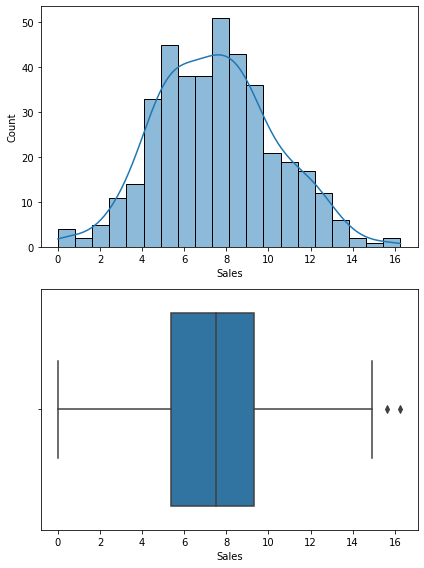

In [4]:
eda_1_n(data, 'Sales')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

In [5]:
data['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (3) Income

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

In [6]:
data['Income'].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (5) Population

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

In [7]:
data['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (7) Age

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

# 4.단변량분석 : 범주형 변수

In [ ]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

## (1) Urban

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량 및 분포 확인

In [ ]:
var = 'Urban'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음

4) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

## (2) ShelveLoc

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

2) 기초통계량 및 분포 확인

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4) 추가 분석해 볼 사항이 있나요?